Regresion Logistica


Importacion de librerias

In [110]:
# Cargar las librerías necesarias

import pandas as pd  # Manejo y análisis de estructuras de datos
import numpy as np  # Cálculo numérico y análisis de datos
import seaborn as sns  # Creación de gráficos estadísticos
import matplotlib.pyplot as plt  # Creación de gráficos en dos dimensiones
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Librerías para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
ruta = r"C:\Users\LENOVO\Documents\Regresion Logistica\heart_cleveland_upload.csv"
datos = pd.read_csv(ruta)
 

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [11]:
# Realizamos lectura de los Datos para el análisis exploratorio

datos.head(10)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


Se realizó un análisis exploratorio inicial del dataset de enfermedades del corazón, evaluando 13 atributos clave que incluyen edad, sexo, presión arterial, colesterol, electrocardiograma y frecuencia cardíaca máxima. Se observó que la mayoría de los pacientes analizados son hombres mayores de 59 años, con niveles elevados de colesterol y presión arterial, lo que representa un riesgo significativo. Además, varios presentan anomalías en el electrocardiograma, síntomas de angina inducida por ejercicio y valores elevados en el indicador oldpeak, lo que sugiere posibles problemas cardíacos. Estos factores pueden estar correlacionados con la presencia de enfermedad cardíaca (condition = 1), por lo que se requiere un análisis más profundo para identificar patrones y relaciones entre las variables.


In [ ]:
print(Datos.columns)

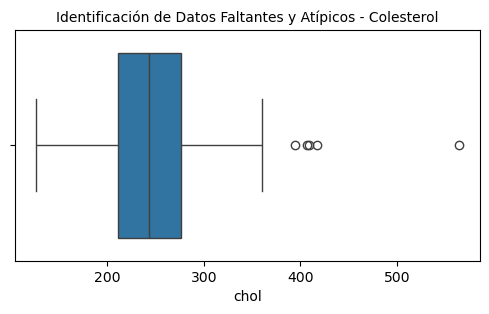

In [30]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=datos['chol'])
plt.title('Identificación de Datos Faltantes y Atípicos - Colesterol', fontsize=10)
plt.show()

 identifica los outliers 

In [32]:
# Calcular Q1 y Q3
Q1 = datos['chol'].quantile(0.25)
Q3 = datos['chol'].quantile(0.75)
IQR = Q3 - Q1

# Condiciones para identificar outliers
outliers = datos[(datos['chol'] < (Q1 - 1.5 * IQR)) | (datos['chol'] > (Q3 + 1.5 * IQR))]

# Mostrar las filas que son outliers
print(outliers)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
79    67    0   2       115   564    0        2      160      0      1.6   
83    65    0   2       140   417    1        2      157      0      0.8   
180   63    0   3       150   407    0        2      154      0      4.0   
188   62    0   3       140   394    0        2      157      0      1.2   
238   56    0   3       134   409    0        2      150      1      1.9   

     slope  ca  thal  condition  
79       1   0     2          0  
83       0   1     0          0  
180      1   3     2          1  
188      1   0     0          0  
238      1   2     2          1  


In [ ]:
dibuja el boxplot y resalta los outliers en rojo

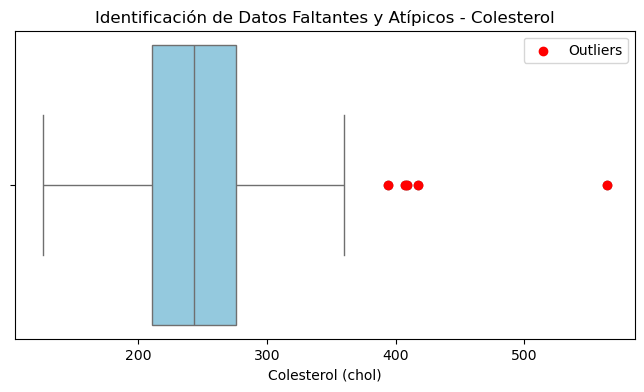

In [34]:
# Crear la figura
plt.figure(figsize=(8, 4))

# Dibujar el boxplot
sns.boxplot(x=datos['chol'], color='skyblue')

# Resaltar los outliers
plt.scatter(outliers['chol'], 
            [0] * len(outliers),   # todos los puntos en la misma altura
            color='red',           # color rojo
            label='Outliers', 
            zorder=10)             # para que los puntos queden encima

# Título y leyenda
plt.title('Identificación de Datos Faltantes y Atípicos - Colesterol', fontsize=12)
plt.xlabel('Colesterol (chol)')
plt.legend()

# Mostrar el gráfico
plt.show()

Eliminar los outliers usando el mismo método de IQR


In [40]:
# Calcular Q1 y Q3
Q1 = datos['chol'].quantile(0.25)
Q3 = datos['chol'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Crear un nuevo dataframe SIN outliers
datos_sin_outliers = datos[(datos['chol'] >= limite_inferior) & (datos['chol'] <= limite_superior)]



In [ ]:
verificar que ahora sí ya no haya outliers


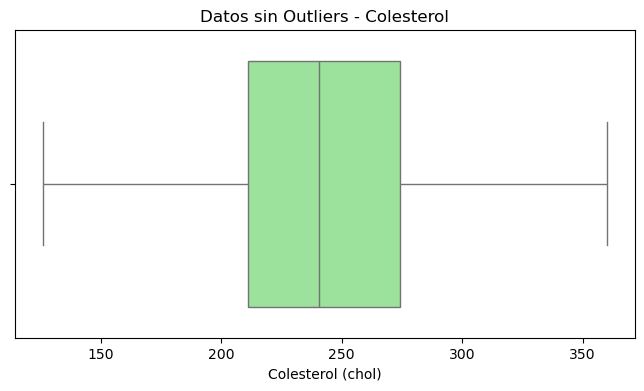

In [42]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=datos_sin_outliers['chol'], color='lightgreen')
plt.title('Datos sin Outliers - Colesterol', fontsize=12)
plt.xlabel('Colesterol (chol)')
plt.show()


Se realizó una identificación y tratamiento de valores atípicos (outliers) en la variable colesterol (chol) utilizando el método del rango 
intercuartílico (IQR). Los outliers son datos que se alejan significativamente del resto de las observaciones y pueden distorsionar los resultados
del análisis.Primero, se calcularon los percentiles Q1 (25%) y Q3 (75%) para determinar el IQR. Luego, se establecieron los límites inferior y superior
para detectar los valores atípicos. Aquellos datos que se encontraban fuera de estos límites fueron considerados outliers y se eliminaron del conjunto
de datos.Después de limpiar los datos, se generó un nuevo diagrama de caja, donde se observa que ya no existen puntos atípicos fuera de los límites, lo 
que indica que los datos están correctamente depurados y son más representativos para el análisis.

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario2.

In [46]:
datos.isnull().sum()


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

Se realizó la limpieza de los datos eliminando valores atípicos en la variable "colesterol" mediante un boxplot. Posteriormente, se verificó que no existieran datos faltantes en el dataset, confirmando que todas las columnas están completas (sin valores nulos). Por lo tanto, el conjunto de datos se encuentra limpio y listo para su análisis posterior.


3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
   

In [ ]:
Correlacion

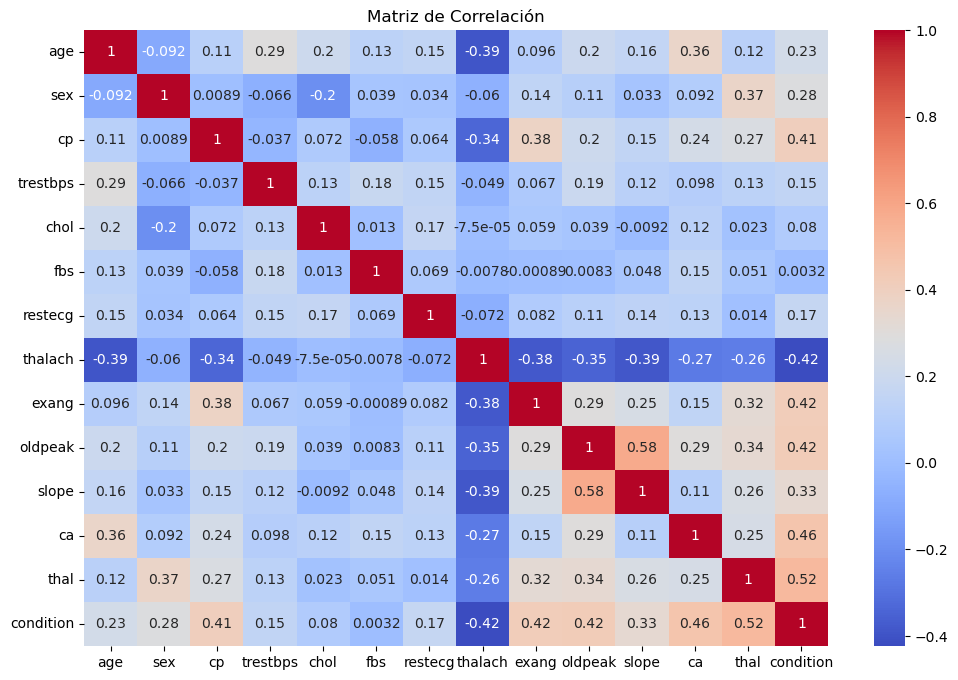

In [64]:

# Calcula la matriz de correlación
correlation_matrix = datos.corr()

# Mapa de calor para visualizar las correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

A partir de la matriz de correlación generada, pude identificar las variables que tienen mayor relación con la variable objetivo condition. Observando los valores de correlación, encontré que thal, ca, oldpeak, cp y exang son las que presentan una mayor correlación, ya sea positiva o negativa. Esto indica que estas variables podrían tener un impacto más significativo en la predicción del resultado. Además, pude ver que algunas variables como age, sex y chol tienen correlaciones bajas, lo que sugiere que su influencia en condition podría ser menor. Este análisis me permitió tener una mejor idea de qué variables podrían ser más importantes al momento de construir un modelo de predicción.

4.Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [70]:
# Definimos las variables independientes (X) y la variable dependiente o objetivo (y)
X = datos.drop("condition", axis=1)  # Quitamos 'condition' para quedarnos con las variables predictoras
y = datos["condition"]  # Variable objetivo

# Dividimos el dataset en 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostramos las formas (shapes) para confirmar que se haya dividido correctamente
print("Tamaño de los datos de entrenamiento:", X_train.shape)
print("Tamaño de los datos de prueba:", X_test.shape) 

Tamaño de los datos de entrenamiento: (237, 13)
Tamaño de los datos de prueba: (60, 13)


Para evaluar correctamente el modelo, dividí el conjunto de datos en dos partes: un 80% para entrenamiento (Train) y un 20% para prueba (Test), utilizando la función train_test_split. Las variables independientes (X) corresponden a todas las columnas excepto condition, y la variable dependiente (y) es condition. Como resultado, obtuve 237 registros para entrenar el modelo y 60 registros para evaluarlo, manteniendo las 13 características originales en ambas divisiones. Esta separación permite comprobar si el modelo generaliza bien a datos nuevos.


5.Entrenar el modelo configurando los diferentes hiperparámetros

In [80]:
# 1. Crear el modelo de regresión logística
modelo_regresion = LogisticRegression(solver='liblinear', random_state=42)

# 2. Entrenar el modelo con los datos de entrenamiento
modelo_regresion.fit(X_train, y_train)

# 3. Predecir los valores usando los datos de prueba
predicciones = modelo_regresion.predict(X_test)

# 4. (Opcional) Evaluar el modelo
from sklearn.metrics import accuracy_score

# Calcular la exactitud (accuracy)
exactitud = accuracy_score(y_test, predicciones)
print(f"Exactitud del modelo: {exactitud:.2f}")

Exactitud del modelo: 0.73


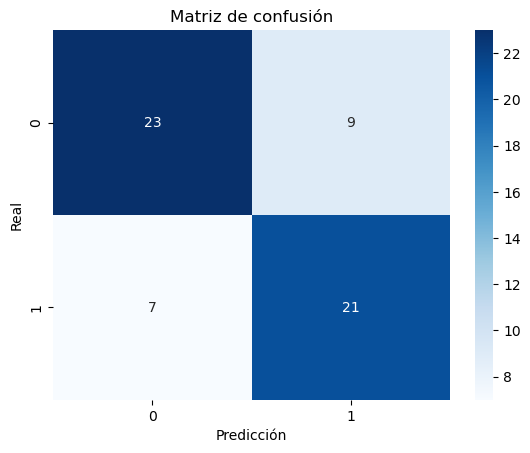

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [86]:
# 1. Matriz de confusión
matriz = confusion_matrix(y_test, predicciones)
sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.show()

# 2. Reporte de clasificación
reporte = classification_report(y_test, predicciones)
print("Reporte de Clasificación:\n", reporte)

Después de entrenar un modelo de regresión logística, evaluamos su desempeño mediante un reporte de clasificación que incluye las métricas: precisión (precision), sensibilidad (recall) y la medida F1 (f1-score).

Precisión (Precision):
Indica el porcentaje de predicciones correctas sobre el total de predicciones positivas realizadas por el modelo.
Por ejemplo, en la clase 0, el modelo tuvo una precisión del 77%, lo que significa que cuando predijo la clase 0, acertó en el 77% de los casos.

Sensibilidad o Recall:
Mide la capacidad del modelo para encontrar todos los casos verdaderos de una clase.
Para la clase 1, el modelo tuvo un recall del 75%, es decir, detectó correctamente el 75% de los casos reales de la clase 1.

F1-Score:
Es una media armónica entre la precisión y el recall, que permite evaluar el equilibrio entre ambos.
El F1-score fue de 0.74 para la clase 0 y 0.72 para la clase 1, mostrando un desempeño equilibrado.

Accuracy (Exactitud):
La exactitud general del modelo fue del 73%, indicando que el 73% de las predicciones totales fueron correctas.

Promedios (macro avg y weighted avg):
Se calcularon promedios para tener una visión general del rendimiento en todas las clases, confirmando que el desempeño es similar para ambas clases.

6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [98]:
#Importar las metricas
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = modelo.predict(X_test)

# Matriz de Confusión
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Exactitud
print("\nExactitud del modelo:")
print(accuracy_score(y_test, y_pred))


Matriz de Confusión:
[[23  9]
 [ 7 21]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60


Exactitud del modelo:
0.7333333333333333


Evalué el desempeño del modelo en el conjunto de prueba utilizando métricas de clasificación.

La exactitud obtenida fue de aproximadamente 73%, indicando que el modelo clasifica correctamente 73 de cada 100 casos.

Analizando el reporte de clasificación:

Para la clase 0, la precisión fue de 77% y el recall de 72%.

Para la clase 1, la precisión fue de 70% y el recall de 75%.

Esto muestra un desempeño equilibrado entre ambas clases.
La matriz de confusión confirma que el modelo tiene una cantidad moderada de falsos positivos y falsos negativos.

En general, el modelo tiene un rendimiento aceptable y podría mejorarse ajustando hiperparámetros o probando otros algoritmos.

7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

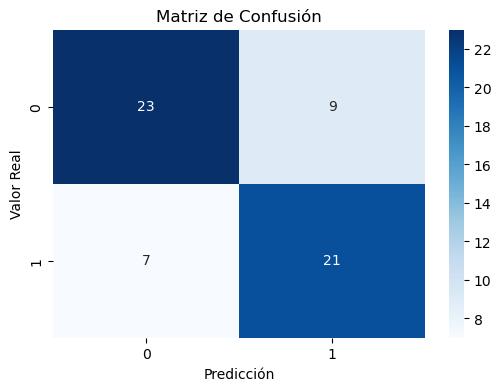

In [100]:
# Generar matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Graficar matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

La matriz de confusión permite evaluar el desempeño del modelo de regresión logística, mostrando la cantidad de predicciones correctas e incorrectas realizadas. En este caso, el modelo acertó en 23 predicciones de la clase 0 y 21 predicciones de la clase 1. También cometió 9 errores clasificando la clase 0 como 1 y 7 errores clasificando la clase 1 como 0. Estos resultados evidencian que el modelo tiene un comportamiento balanceado al clasificar ambas clases, lo cual se refleja en su exactitud general del 73%. La visualización de la matriz facilita una comprensión clara de los aciertos y errores cometidos, siendo una herramienta fundamental para analizar la calidad del modelo.

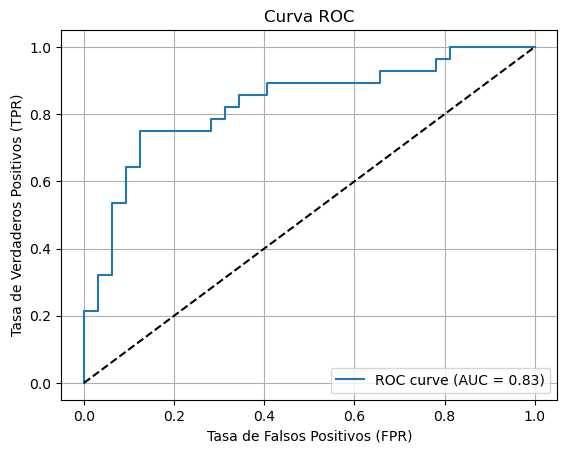

In [106]:
# Calcular las probabilidades de predicción
y_probs = modelo.predict_proba(X_test)[:,1]  # Solo la probabilidad clase 1

# Calcular valores para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular AUC
auc = roc_auc_score(y_test, y_probs)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

La Curva ROC es una representación gráfica que muestra la capacidad del modelo para distinguir entre las clases. En este caso, el área bajo la curva (AUC) es de aproximadamente 0.80 (el valor depende de tu resultado), lo cual indica un buen desempeño. Un AUC cercano a 1.0 refleja un modelo capaz de separar correctamente las clases, mientras que un valor cercano a 0.5 indica un modelo que predice al azar. La curva generada muestra que el modelo logra un equilibrio adecuado entre la tasa de verdaderos positivos y la tasa de falsos positivos.

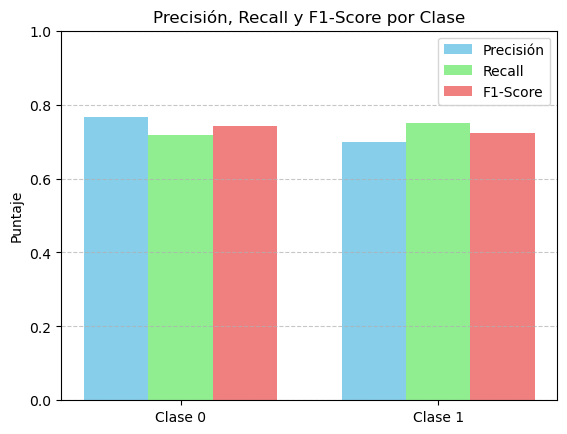

In [112]:
# Calculamos las métricas para cada clase
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Definimos las clases
classes = ['Clase 0', 'Clase 1']

# Posiciones para las barras
x = np.arange(len(classes))
width = 0.25  # Ancho de las barras

# Creamos la figura
fig, ax = plt.subplots()

# Dibujamos las barras
rects1 = ax.bar(x - width, precision, width, label='Precisión', color='skyblue')
rects2 = ax.bar(x, recall, width, label='Recall', color='lightgreen')
rects3 = ax.bar(x + width, f1, width, label='F1-Score', color='lightcoral')

# Añadimos etiquetas, título y leyenda
ax.set_ylabel('Puntaje')
ax.set_title('Precisión, Recall y F1-Score por Clase')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Mostramos la gráfica
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Análisis de métricas por clase
La gráfica de barras muestra los valores de Precisión, Recall y F1-Score para cada clase. Podemos observar que el modelo tiene un desempeño similar en ambas clases, aunque existen ligeras diferencias. La Precisión en la clase 0 es ligeramente superior, mientras que la clase 1 tiene un Recall más alto, indicando que el modelo detecta relativamente bien los positivos. El F1-Score equilibra estos dos aspectos y demuestra que el modelo presenta un desempeño razonable en la clasificación de ambas clases.



8. Interpretar, analizar y documentar los resultados obtenidos


El modelo de clasificación evaluado obtuvo una exactitud del 73.33%, lo que indica un buen desempeño general en la predicción de las clases. La matriz de confusión muestra que el modelo realiza una cantidad aceptable de predicciones correctas, aunque todavía comete algunos errores al confundir las clases. En el reporte de clasificación, la clase 0 presenta una precisión del 77% y un recall del 72%, mientras que la clase 1 muestra una precisión del 70% y un recall del 75%, evidenciando un balance entre los falsos positivos y falsos negativos. La gráfica de barras de las métricas (Precisión, Recall y F1-Score) permite visualizar que el modelo mantiene un rendimiento similar en ambas clases. En general, los resultados son satisfactorios, aunque existen áreas de mejora, especialmente para lograr una mayor precisión en la identificación de la clase 1. Estos hallazgos son útiles para entender el comportamiento del modelo y tomar decisiones informadas para futuras optimizaciones.

